<a href="https://colab.research.google.com/github/isaacdono/EA991-Atividade_01/blob/main/solucao/atividade_01_247175.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 01 - Classificação Linear

Como primeira atividade entregável da disciplina, vamos aplicar o modelo de regressão logística ao problema de classificar espécimes de cogumelos como comestíveis ou venenosos.

Para isso, vamos utilizar o *dataset* disponível no UCI Machine Learning Repository: https://doi.org/10.24432/C5959T

![](https://storage.googleapis.com/kaggle-datasets-images/478/974/557711140aeab7ca242d1e903c4e058e/dataset-cover.jpg)

Este *dataset* apresenta pelo menos duas peculiaridades:
* Atributos categóricos: símbolos ou *strings* indicam as possibilidades para certas características de um cogumelo.
Por exemplo, o atributo `cap_shape` (forma do chapéu) pode ser: sino (b), cônico (c), convexo (x), plano (f), afundado (s) nodoso (k).
* Atributos faltantes: algumas amostras não possuem valores para todos os atributos.


## Preâmbulo: Carregando o *dataset* (arquivo .csv) para o Drive



In [53]:
""" Carregando o dataset do Github para trabalhar autonomamente no Colab """

import requests
from pathlib import Path

# Caminho para a pasta que conterá o dataset
data_path = Path("data/")

# Se o diretório ainda não existe, criamos e baixamos o dataset
if data_path.is_dir():
    print(f"O diretório {data_path} já existe")
else:
    print(f"Diretório {data_path} não localizado, criando um ...")
    data_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "mushroom.csv", "wb") as f:
        request = requests.get("https://github.com/EA991-Lab/utils/raw/main/data/mushrooms.csv")
        print("Baixando os dados ...")
        f.write(request.content)

O diretório data já existe


Com isso, o arquivo de dados estará disponível no Drive para uso através do caminho "data/mushrooms.csv".


## Parte 1: Análise dos dados

a) Faça uma breve descrição do *dataset*, apontando quantidade de amostras, de atributos (*features*), valores possíveis para cada atributo etc.

b) Trabalhando com o *dataset* na forma de um `Pandas.DataFrame`, obtenha uma visão geral de suas características (ver método `describe()`), avalie o balanceamento entre as classes e mostre os histogramas por atributo. Faça uma discussão geral desses pontos.

c) Existe algum atributo claramente irrelevante para a tarefa? Se sim, por quê?

### Item a:

In [54]:
# Importar pacotes usuais
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Carregar dataset
path = '/content/data/mushroom.csv'
df = pd.read_csv(path,sep=",")

In [56]:
# Primeiras cinco amostras
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [57]:
# Info gerais do DF
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Item b:

In [58]:
# Descrever DF
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [59]:
# Balanceamento entre as classes

# As classes coméstivel e venenoso têm quantidade de cogumelos semelhantes.
# Todas os atributos têm o mesmo número total de valores, 8124, logo não há desbalaceamento dentre os atributos categóricos.
# Porém dentre os seus valores, há variada distribuição para cada atributo, algumas seguem algo parecido à normal, como a
# do odor e gill-color.

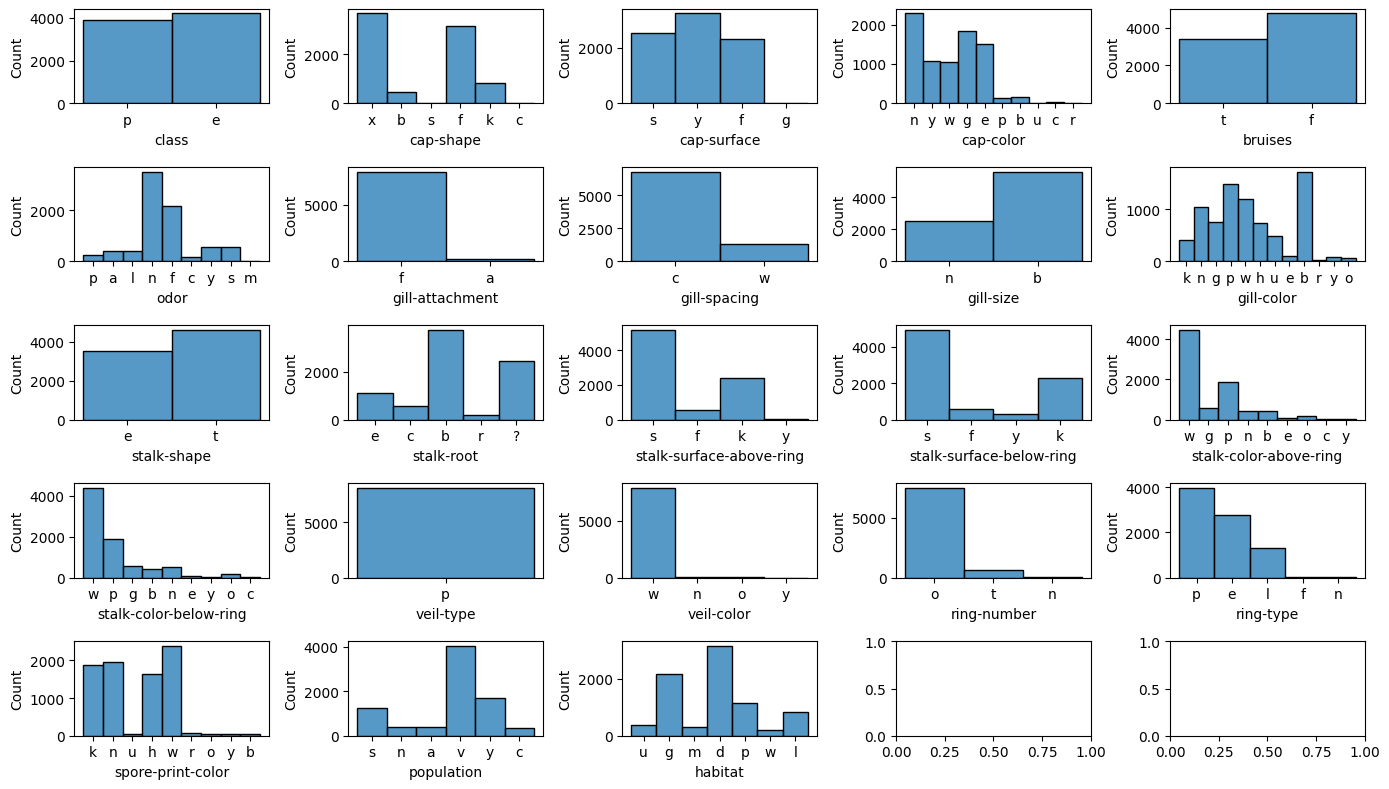

In [60]:
# Histogramas
fig, axs = plt.subplots(5,5, figsize=(14, 8))
for col, ax in zip(df.columns, axs.flat):
    sns.histplot(data=df, x=col, kde=False, common_norm=False,legend=ax==axs[0,0], ax=ax)
plt.tight_layout()
plt.show()


Conforme escrito anteriormente, as classes estão balanceadas. Contudo, nota-se algumas disparidades nos atributos. Por exemplo, nas classes *gil_attachment* há predominância quase total de **g**, em *veil-type* de **p** e *veil-color* de **w**. Além disso, há atributos faltantes na classe *stalk-root*.

### Item c:

O atributo **r** apresenta pouquíssima frequência considerando o conjunto dos histogramas.

In [61]:
# Contagem de r
r_count = 0
for col in df.columns:
    r_count += (df[col] == 'r').sum()
print(f'A quantidade de atributos r no dataset é: {r_count}')

A quantidade de atributos r no dataset é: 304


## Parte 2: Ajustando o *dataset*

d) Implemente soluções para arrumar a base de dados de tal forma que esteja pronta para ser utilizada no treinamento e teste de modelos de classificação.

**Consultar:**

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder
- https://scikit-learn.org/stable/api/sklearn.impute.html



### Item d:

In [100]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# O drop de df['class'] foi feito no item g

# Trocar char do missing value
df_replaced = df.replace('?', np.nan, inplace=False)

# Substituir NaN por um valor de fato
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df_replaced), columns=df_replaced.columns)

# Transformar strings em numeros
encoder = OrdinalEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df_imputed), columns=df.columns)

In [138]:
# df_encoded.head()

In [68]:
# plt.figure(figsize=(4, 2))
# sns.histplot(df_encoded['stalk-root'], kde=False)
# plt.show()

## Parte 3: Análise de alguns atributos numéricos

e) Como complemento da análise inicial e para explorar algumas visualizações adicionais, exiba um histograma das classes para cada valor possível (já numérico) de dois atributos.

- Veja a função `catplot` do `seaborn`, com a opção `kind = "count"` - https://seaborn.pydata.org/generated/seaborn.catplot.html

f) Para estes dois atributos, mostre também o *box-plot* em função dos rótulos.
- Obs.: a função `catplot` também pode ser usada aqui.


### Item e:


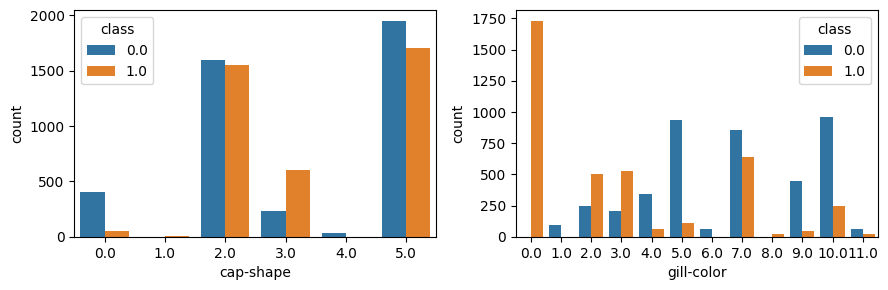

In [110]:
# A função sns.catplot cria uma figura separada por padrão,
# ao invés de colocá-las lado a lado em uma única figura,
# por isso o uso de sns.countplot como alternativa

fig, axs = plt.subplots(1, 2, figsize=(9, 3))

sns.countplot(x='cap-shape', hue='class', data=df_encoded, ax=axs[0])
sns.countplot(x='gill-color', hue='class', data=df_encoded, ax=axs[1])

# Não sobrepor os gráficos
plt.tight_layout()

### Item f:

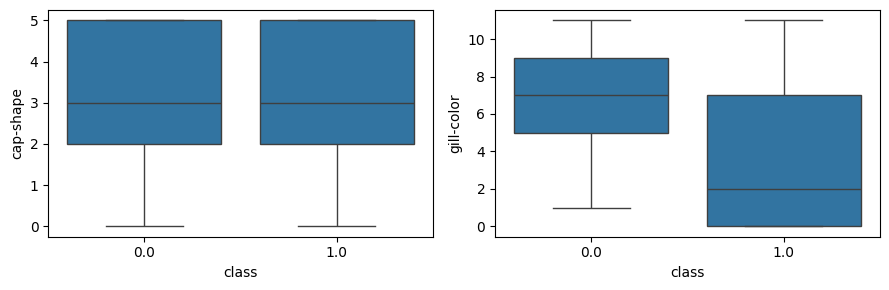

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))

sns.boxplot(x="class", y="cap-shape", data=df_encoded, ax=axs[0])
sns.boxplot(x="class", y="gill-color", data=df_encoded, ax=axs[1])

plt.tight_layout()
plt.show()

## Parte 4: Treinamento e avaliação da regressão logística

g) Aplique o modelo de regressão logística ao *dataset Mushroom*. Para isso, comente as escolhas metodológicas e de hiperparâmetros. Mostre, então, a matriz de confusão para o classificador considerando o conjunto de teste, bem como os valores de algumas métricas de desempenho (tanto globais quanto por classe). Para deixar mais completo o exercício, apresente esses resultados para três configurações distintas e significativas do modelo (e.g., ao variar o coeficiente de regularização $C$).

h) Apresente a curva ROC e o valor da área (AUC). Registre, por fim, as principais observações a respeito do desempenho geral da regressão logística.
- Consultar: https://scikit-learn.org/stable/api/sklearn.metrics.html




### Item g e h:


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, roc_curve, auc

# Dividir as variáveis independentes (X) e dependentes (y)
X = df_encoded.drop(columns=['class'])
y = df_encoded['class']

# Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Treinando modelo com C = 0.01

Relatório de Classificação (C = 0.01):
              precision    recall  f1-score   support

      edible       0.89      0.95      0.92       843
   poisonous       0.94      0.87      0.90       782

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

F1-score no conjunto de teste (C = 0.01): 0.9097


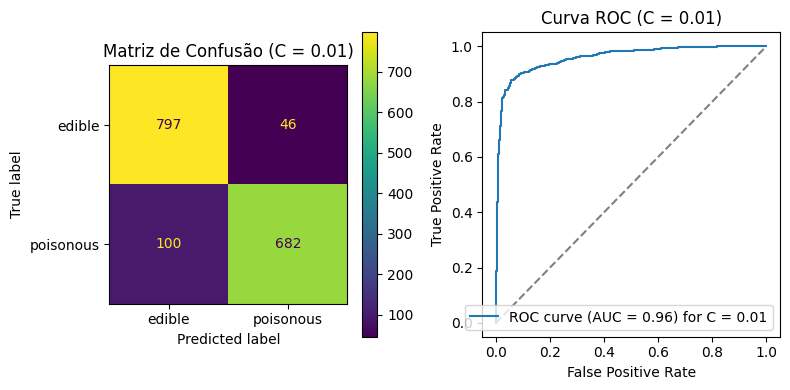

AUC (Área Sob a Curva) para C = 0.01: 0.9596
---------------------------------------------------

Treinando modelo com C = 1

Relatório de Classificação (C = 1):
              precision    recall  f1-score   support

      edible       0.96      0.95      0.96       843
   poisonous       0.95      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

F1-score no conjunto de teste (C = 1): 0.9538


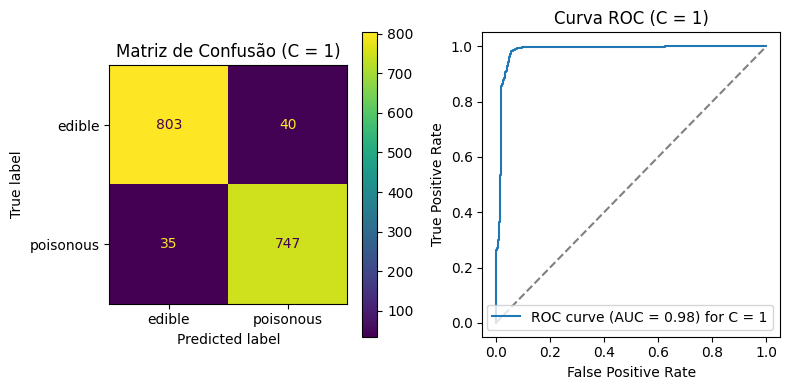

AUC (Área Sob a Curva) para C = 1: 0.9834
---------------------------------------------------

Treinando modelo com C = 100

Relatório de Classificação (C = 100):
              precision    recall  f1-score   support

      edible       0.98      0.95      0.97       843
   poisonous       0.95      0.98      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.97      0.96      0.96      1625

F1-score no conjunto de teste (C = 100): 0.9649


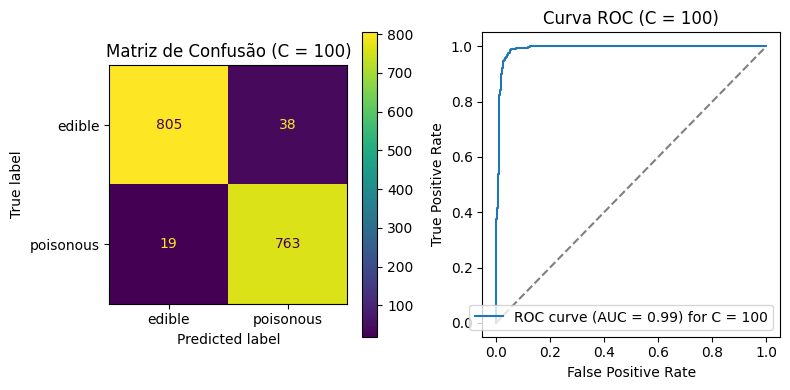

AUC (Área Sob a Curva) para C = 100: 0.9899
---------------------------------------------------


In [137]:
# O modelo com C=0.01 terá uma menos flexibilidade.
# Já o modelo com C=100 terá mais flexibilidade,
# o que pode levar a overfitting.
# E o valor C=1 serve como um valor moderado.
C_values = [0.01, 1, 100]

for C in C_values:
    print(f"\nTreinando modelo com C = {C}")

    # Inicialização, treino e teste do modelo
    lr_model = LogisticRegression(C=C, max_iter=1000, penalty='l2')
    lr_model.fit(X_train, y_train)
    y_pred_test = lr_model.predict(X_test)

    # Rótulos das classes
    class_names = ['edible', 'poisonous']

    # Relatório de classificação
    print(f"\nRelatório de Classificação (C = {C}):")
    print(classification_report(y_true=y_test, y_pred=y_pred_test, target_names=class_names))

    # F1-score (média macro)
    f1 = f1_score(y_true=y_test, y_pred=y_pred_test, average='macro')
    print(f"F1-score no conjunto de teste (C = {C}): {f1:.4f}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 1 linha, 2 colunas, tamanho ajustado

    # Plotando a matriz de confusão no ax1
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    ConfusionMatrixDisplay(cm, display_labels=class_names).plot(ax=ax1)  # Passa o ax1
    ax1.set_title(f'Matriz de Confusão (C = {C})')

    # Cálculo da curva ROC e AUC
    y_pred_prob = lr_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva (1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plotando a curva ROC no ax2
    ax2.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}) for C = {C}')
    ax2.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'Curva ROC (C = {C})')
    ax2.legend(loc='lower right')

    plt.tight_layout()  # Ajusta o layout para que os gráficos não se sobreponham
    plt.show()

    print(f"AUC (Área Sob a Curva) para C = {C}: {roc_auc:.4f}")
    print("---------------------------------------------------")

O modelo com C = 0.01 possui uma regularização maior e impede o modelo de se ajustar excessivamente aos dados de treinamento. Isso resulta em uma precisão de 0.89 para a classe "edible" e 0.94 para a classe "poisonous". Embora a precisão e o recall para ambas as classes sejam boas, o modelo tem um F1-score médio de 0.91. O AUC de 0.96 indica um bom desempenho geral, mas o modelo é menos sensível ao detectar "poisonous".  

Com C = 1, há um ajuste moderado aos dados de treinamento, mas ainda mantendo um equilíbrio. O modelo alcança uma precisão de 0.96 para "edible" e 0.95 para "poisonous", com um F1-score médio de 0.95, o que reflete uma performance sólida. O AUC de 0.98 sugere uma excelente capacidade de distinguir entre as classes. Esse valor de C oferece um bom custo-benefício.  

Já com C = 100, o modelo tem mais chances de overfitting. O modelo apresenta precisão de 0.98 para "edible" e 0.95 para "poisonous", com um F1-score médio de 0.96. O AUC de 0.99 é ainda mais alto, indicando que o modelo tem uma ótima capacidade de discriminação.